In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Ali\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Load the movies dataset and also pass header=None since files don't contain any headers
movies_df = pd.read_csv('Dataset/ml-1m/movies.dat', sep='::', header=None, engine='python')
movies_df.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Load the ratings dataset
ratings_df = pd.read_csv('Dataset/ml-1m/ratings.dat', sep='::', header=None, engine='python')
ratings_df.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
# Lets rename our columns in these data frames so we can convey their data better
movies_df.columns = ['MovieID', 'Title', 'Genres']
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

In [5]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies_df.shape

(3883, 3)

In [7]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
ratings_df.shape

(1000209, 4)

In [9]:
movies_df['List Index'] = movies_df.index

In [10]:
movies_df.head()

,MovieID,Title,Genres,List Index
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama,3
4,5,Father of the Bride Part II (1995),Comedy,4


In [11]:
# Merge movies_df with ratings_df by MovieID
merged_df = movies_df.merge(ratings_df, on='MovieID')

In [12]:
merged_df.head()

,MovieID,Title,Genres,List Index,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,0,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,0,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,0,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,0,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,0,10,5,978226474


In [13]:
# Drop unnecessary columns
merged_df = merged_df.drop('Timestamp', axis=1).drop('Title', axis=1).drop('Genres', axis=1)

In [14]:
merged_df.head()

,MovieID,List Index,UserID,Rating
0,1,0,1,5
1,1,0,6,4
2,1,0,8,4
3,1,0,9,5
4,1,0,10,5


In [15]:
user_Group = merged_df.groupby('UserID')

In [16]:
user_Group.head()

,MovieID,List Index,UserID,Rating
0,1,0,1,5
1,1,0,6,4
2,1,0,8,4
3,1,0,9,5
4,1,0,10,5
...,...,...,...,...
874890,3285,3216,1270,1
883271,3357,3288,4896,5
903916,3448,3379,4025,5
928813,3548,3479,986,3


In [17]:
# Amount of users used for training
amountOfUsedUsers = 1000

In [18]:
# Creating the training list
trX = []

In [19]:
# For each user in the group
for userID, curUser in user_Group:

    # Create a temp that stores every movie's rating
    temp = [0]*len(movies_df)

    # For each movie in curUser's movie list
    for num, movie in curUser.iterrows():

        # Divide the rating by 5 and store it
        temp[movie['List Index']] = movie['Rating']/5.0

    # Add the list of ratings into the training list
    trX.append(temp)

    # Check to see if we finished adding in the amount of users for training
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1

In [90]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [91]:
# Setting the models Parameters
hiddenUnits = 50
visibleUnits = len(movies_df)
vb = tf.placeholder(tf.float32, [visibleUnits])  # Number of unique movies
hb = tf.placeholder(tf.float32, [hiddenUnits])  # Number of features were going to learn
W = tf.placeholder(tf.float32, [visibleUnits, hiddenUnits])  # Weight Matrix

In [92]:
# Phase 1: Input Processing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)  # Visible layer activation
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))  # Gibb's Sampling

In [93]:
# Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb)  # Hidden layer activation
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [94]:
""" Set RBM Training Parameters """

# Learning rate
alpha = 1.0

# Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)

# Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])

# Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

# Set the error function, here we use Mean Absolute Error Function
err = v0 - v1
err_sum = tf.reduce_mean(err*err)

Instructions for updating:
Use `tf.cast` instead.


In [95]:
""" Initialize our Variables with Zeroes using Numpy Library """

# Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)

# Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)

# Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)

# Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)

# Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)

# Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [97]:
# Train RBM with 15 Epochs, with Each Epoch using 10 batches with size 100, After training print out the error by epoch
epochs = 15
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip(range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
    print(errors[-1])

0.04324591
0.042520247
0.04180126
0.04129221
0.040883187
0.04040138
0.039894335
0.039863184
0.03932889
0.039334804
0.038918484
0.03871539
0.03873446
0.03871344
0.03848762


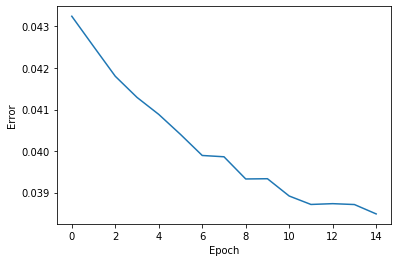

In [98]:
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [99]:
# Select the input User
inputUser = [trX[50]]


In [100]:
# Feeding in the User and Reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={hh0: feed, W: prv_w, vb: prv_vb})


In [101]:
# List the 20 most recommended movies for our mock user by sorting it by their scores given by our model.
scored_movies_df_50 = movies_df
scored_movies_df_50["Recommendation Score"] = rec[0]
print(scored_movies_df_50.sort_values(["Recommendation Score"], ascending=False).head(20))

      MovieID                                        Title  \
2789     2858                       American Beauty (1999)   
3091     3160                              Magnolia (1999)   
2327     2396                   Shakespeare in Love (1998)   
476       480                         Jurassic Park (1993)   
2693     2762                      Sixth Sense, The (1999)   
2530     2599                              Election (1999)   
3878     3948                      Meet the Parents (2000)   
3509     3578                             Gladiator (2000)   
604       608                                 Fargo (1996)   
220       223                                Clerks (1994)   
2631     2700  South Park: Bigger, Longer and Uncut (1999)   
3684     3753                          Patriot, The (2000)   
3682     3751                           Chicken Run (2000)   
2326     2395                              Rushmore (1998)   
315       318             Shawshank Redemption, The (1994)   
3827    

In [102]:
""" Recommend User what movies he has not watched yet """

# Find the mock user's UserID from the data
print(merged_df.iloc[50])  # Result you get is UserID 150

# Find all movies the mock user has watched before
movies_df_50 = merged_df[merged_df['UserID'] == 150]
print(movies_df_50.head())

MovieID         1
List Index      0
UserID        150
Rating          4
Name: 50, dtype: int64
       MovieID  List Index  UserID  Rating
50           1           0     150       4
11866       24          23     150       4
12492       25          24     150       4
15967       34          33     150       5
36528      111         109     150       4


In [103]:
""" Merge all movies that our mock users has watched with predicted scores based on his historical data: """

# Merging movies_df with ratings_df by MovieID
merged_df_50 = scored_movies_df_50.merge(movies_df_50, on='MovieID', how='outer')

# Dropping unnecessary columns
merged_df_50 = merged_df_50.drop('List Index_y', axis=1).drop('UserID', axis=1)


In [104]:
# Sort and take a look at first 20 rows
print(merged_df_50.sort_values(['Recommendation Score'], ascending=False).head(20))

""" There are some movies the user has not watched and has high score based on our model. So, we can recommend them. """

      MovieID                                        Title  \
2789     2858                       American Beauty (1999)   
3091     3160                              Magnolia (1999)   
2327     2396                   Shakespeare in Love (1998)   
476       480                         Jurassic Park (1993)   
2693     2762                      Sixth Sense, The (1999)   
2530     2599                              Election (1999)   
3878     3948                      Meet the Parents (2000)   
3509     3578                             Gladiator (2000)   
604       608                                 Fargo (1996)   
220       223                                Clerks (1994)   
2631     2700  South Park: Bigger, Longer and Uncut (1999)   
3684     3753                          Patriot, The (2000)   
3682     3751                           Chicken Run (2000)   
2326     2395                              Rushmore (1998)   
315       318             Shawshank Redemption, The (1994)   
3827    

' There are some movies the user has not watched and has high score based on our model. So, we can recommend them. '